In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)

In [31]:
pwd

'/Users/eduardoparkinson/Desktop/Input-Data'

In [32]:
ls

**Credit-Default-LAST**-Copy1.ipynb*
Credit-Default.ipynb*
DL-PreProcessing.ipynb
Deep-Learning/
Exams - timetable.rtf*
GLM_baseline.csv*
HomeCredit_columns_description.csv*
POS_CASH_balance.csv*
SVNH-model.ipynb
THISONE**Credit-Def-LRM&LIGHTGBM-LAST**-.ipynb*
THISONE-LAST.ipynb
XGB_pred2.csv*
anaconda-client/
application_test.csv*
application_train.csv*
bureau.csv*
bureau_balance.csv*
checkpnts/
client_secrets.json*
credit_card_balance.csv*
feature_matrix.csv*
features.txt*
installments_payments.csv*
previous_application.csv*
sample_submission.csv*
worker-spec.rtf*
worker-spec1.yml*


In [33]:

def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('Deep-Learning/train_32x32.mat')
X_test, y_test = load_data('Deep-Learning/test_32x32.mat')

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [34]:

# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


In [35]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

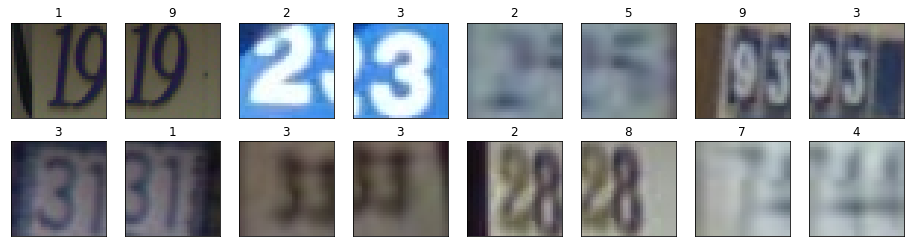

In [36]:
# Plot some training set images
plot_images(X_train, y_train, 2, 8)


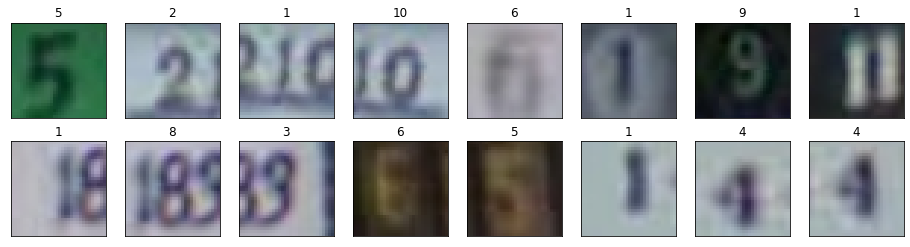

In [37]:
# Plot some test set images
plot_images(X_test, y_test, 2, 8)

In [38]:
print(np.unique(y_train))


[ 1  2  3  4  5  6  7  8  9 10]


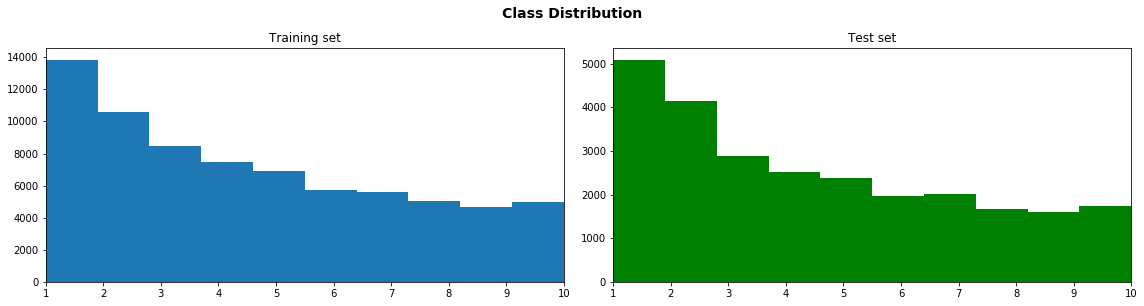

In [39]:

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

In [40]:

y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [41]:
print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]


In [42]:
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7, stratify = y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.13, random_state=7)

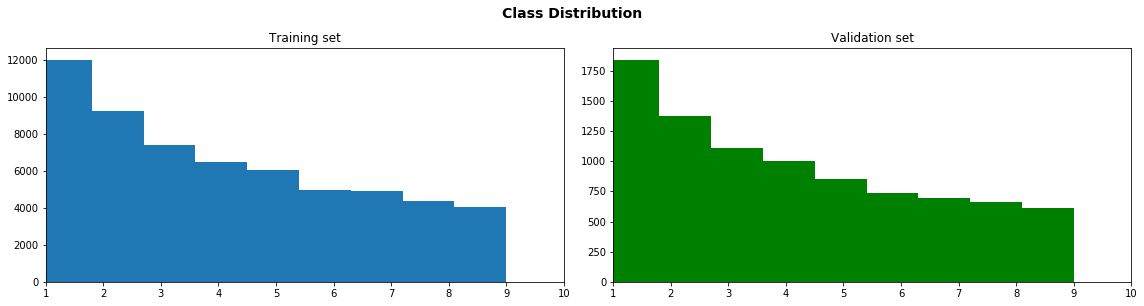

In [43]:
#Visualize New Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation set")

fig.tight_layout()

In [44]:
y_train.shape, y_val.shape, y_test.shape


((63733,), (9524,), (26032,))

In [45]:

#Grayscale Conversion
#To speed up our experiments we will convert our images from RGB to Grayscale, 
#which grately reduces the amount of data we will have to process.

def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [46]:
#Converting to Float for numpy computation


train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)
val_greyscale = rgb2gray(X_val).astype(np.float32)

In [47]:

print("Training Set", train_greyscale.shape)
print("Validation Set", val_greyscale.shape)
print("Test Set", test_greyscale.shape)
print('--'*10)

Training Set (63733, 32, 32, 1)
Validation Set (9524, 32, 32, 1)
Test Set (26032, 32, 32, 1)
--------------------


In [48]:
del X_train, X_test, X_val

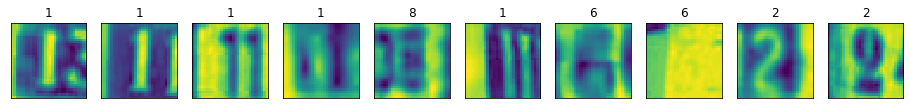

In [49]:


#Ploting the Grayscale Image
#Before Normalization

plot_images(train_greyscale, y_train, 1, 10)


In [50]:
# Calculate the mean on the training data
train_mean = np.mean(train_greyscale, axis=0)

# Calculate the std on the training data
train_std = np.std(train_greyscale, axis=0)

# Subtract it equally from all splits
train_greyscale_norm = (train_greyscale - train_mean) / train_std
test_greyscale_norm = (test_greyscale - train_mean)  / train_std
val_greyscale_norm = (val_greyscale - train_mean) / train_std

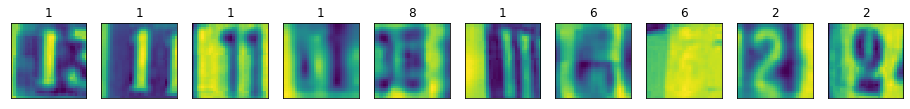

In [51]:
plot_images(train_greyscale_norm, y_train, 1, 10)


In [52]:
#One Hot Label Encoding
#Apply One Hot Encoding to make label
#suitable for CNN Classification

from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Validation set", y_val.shape)
print("Test set", y_test.shape)


Training set (63733, 10)
Validation set (9524, 10)
Test set (26032, 10)


/Users/eduardoparkinson/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [53]:
#Storing Data to Disk
#Stored only the Grayscale Data 
#not the RGB

import h5py

# Create file
h5f = h5py.File('SVHN_grey-10.h5', 'w')

# Store the datasets
h5f.create_dataset('X_train', data=train_greyscale_norm)
h5f.create_dataset('y_train', data=y_train)
h5f.create_dataset('X_test', data=test_greyscale_norm)
h5f.create_dataset('y_test', data=y_test)
h5f.create_dataset('X_val', data=val_greyscale_norm)
h5f.create_dataset('y_val', data=y_val)

# Close the file
h5f.close()